In [1]:
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
## Configuration
## If you are training a new model, set is_training to True, or False to load a pretrained model from a pkl file
is_training = True

## If training a new model, this is the file name that the model will be saved to.
## If not training this will be the name of the pkl file to load.
file_name = '512x512+4_standardized_mae.pkl'

## Set mae_loss to True to use Mean Absolute Error for the loss function, or False to use Mean Squared Error.
mae_loss = True

## Set use_standardization to True to use standardization for feature scaling, or False to use normalization.
use_standardization = True

## Batch size of 28 works for my 16GB of VRAM. However, this value will depend on your specs. Use smaller values if less VRAM is available.
batch_size = 28

## Set the size in pixels that the images should be scaled to. Higher counts will require more VRAM and take longer per epoch to train.
## However, higher values may allow the model to converge with fewer total epochs and achieve a higher accuracy.
img_size = 512

## Set the learning rate to a custom value. Or, to use lr_find to automatically calculate a good learning rate, set lr = 0 (this is the recommended default).
lr = 0

## Set the number of epochs to train for. Should probably be >= ~200 to yield a usable model.
n_epochs = 512

## Set the number of epochs to train while the body of the weights is frozen. This should not be set too high to avoid overfitting (default = 1).
n_freeze_epochs = 4

In [3]:
## Read in y values.
df = pd.read_csv('PhenotypeDataUGA.csv').drop('line', axis=1)
df

,photo_id,perimeter1_cm,width1_cm,heigth1_cm,perimeter2_cm,width2_cm,heigth2_cm,prox_angl_macr,distal_angl_macr,tomat_pericap_area,tomat_pericap_area_ratio,tomat_pericap_thick,tomat_pericap_thick_ratio
0,6742,84.32,16.80,31.41,87.67,17.61,32.41,101.6,112.0,90.94,0.19,1.09,0.2
1,6744,75.96,18.63,25.27,82.09,19.57,26.66,118.3,122.7,73.39,0.18,0.93,0.2
2,6745,69.47,18.00,23.02,73.99,18.98,24.28,124.0,136.9,65.64,0.18,0.92,0.2
3,6746,74.58,14.73,27.44,80.63,15.52,28.92,108.6,101.7,63.50,0.18,0.81,0.2
4,6748,79.19,15.29,30.22,84.72,16.08,31.85,100.5,88.6,73.25,0.18,0.90,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,7714,79.37,16.03,22.55,85.12,16.89,31.21,96.8,105.8,76.44,0.18,0.93,0.2
291,7722,54.35,15.63,16.64,58.76,16.44,17.33,144.5,139.6,48.75,0.21,0.87,0.2
292,7723,49.77,14.02,15.43,57.10,14.79,16.22,138.5,143.7,37.69,0.20,0.69,0.2
293,7727,67.71,18.25,22.06,73.26,19.23,23.25,145.2,126.5,69.12,0.20,0.98,0.2


In [4]:
## Extract column names.
traits = df.columns.values.tolist()[1:]
traits

['perimeter1_cm',
 'width1_cm',
 'heigth1_cm',
 'perimeter2_cm',
 'width2_cm',
 'heigth2_cm',
 'prox_angl_macr',
 'distal_angl_macr',
 'tomat_pericap_area',
 'tomat_pericap_area_ratio',
 'tomat_pericap_thick',
 'tomat_pericap_thick_ratio']

In [5]:
## Feature Scaling
scaler = StandardScaler() if use_standardization else MinMaxScaler()
df.iloc[:, 1:] = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=traits)

df

,photo_id,perimeter1_cm,width1_cm,heigth1_cm,perimeter2_cm,width2_cm,heigth2_cm,prox_angl_macr,distal_angl_macr,tomat_pericap_area,tomat_pericap_area_ratio,tomat_pericap_thick,tomat_pericap_thick_ratio
0,6742,0.857054,-0.681010,1.441886,0.812500,-0.719054,1.313903,-1.571232,-0.618085,0.509113,0.183480,0.319679,-0.078353
1,6744,0.020654,0.029755,0.002392,0.242991,0.011434,-0.013293,-0.434452,-0.052156,-0.242664,-0.205919,-0.411015,-0.078353
2,6745,-0.628657,-0.214935,-0.525110,-0.583714,-0.208458,-0.562638,-0.046450,0.698891,-0.574646,-0.205919,-0.456684,-0.078353
3,6746,-0.117412,-1.484990,0.511138,0.093980,-1.497991,0.508353,-1.094737,-1.162858,-0.666316,-0.205919,-0.959036,-0.078353
4,6748,0.343809,-1.267488,1.162896,0.511416,-1.289281,1.184646,-1.646110,-1.855725,-0.248661,-0.205919,-0.548021,-0.078353
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,7714,0.361817,-0.980075,-0.635299,0.552240,-0.987396,1.036923,-1.897971,-0.946007,-0.112013,-0.205919,-0.411015,-0.078353
291,7722,-2.141380,-1.135434,-2.020870,-2.138124,-1.155110,-2.166814,1.348999,0.841696,-1.298151,0.962278,-0.685026,-0.078353
292,7723,-2.599599,-1.760752,-2.304549,-2.307547,-1.770061,-2.423021,0.940575,1.058547,-1.771921,0.572879,-1.507057,-0.078353
293,7727,-0.804741,-0.117835,-0.750177,-0.658219,-0.115284,-0.800379,1.396648,0.148829,-0.425575,0.572879,-0.182674,-0.078353


In [6]:
## Combine values in each row to a list to pass into the model.
df['combined'] = df[traits].values.tolist()

In [7]:
## Split the dataset.
train, test = train_test_split(df, test_size=0.2, random_state=8)

In [8]:
class TitledList(list, ShowTitle):
    _show_args = {'label': 'text'}
    
    def show(self, ctx=None, **kwargs):
        "Show self"
        return show_title(self, ctx=ctx, **merge(self._show_args, kwargs))

class ToListTensor(DisplayedTransform):
    _show_args = {'label': 'text'}
    
    def __init__(self, split_idx=None,):
        super().__init__(split_idx=split_idx)

    def encodes(self, o): return o
    
    def decodes(self, o): return TitledList(o)

In [9]:
## Create the datablock. Of particular importance are the resize dimensions, method, and pad mode.
## The model gets better results faster when using high resolution images.
## Padding with zeros ensures that there is no loss of aspect ratio or information compared to squishing or cropping.
plant = DataBlock(blocks = [ImageBlock, RegressionBlock(n_out=12)],
                  get_x = ColReader('photo_id', pref=f'fruits/IMG_', suff='.JPG'),
                  get_y = Pipeline( [ColReader('combined'), ToListTensor ]),
                  splitter = RandomSplitter(valid_pct=0.1),
                  item_tfms = Resize(img_size, method=ResizeMethod.Pad, pad_mode=PadMode.Zeros),
                  n_inp = 1
)


In [10]:
## Create the dataloader. Use cuda if available.
if torch.cuda.is_available():
    dls = plant.dataloaders(train, bs=batch_size).cuda()
else:
    dls = plant.dataloaders(train, bs=batch_size)

In [11]:
## Create the learner using resnet50 as the initial weights.
learn = vision_learner(
               dls = dls,
               arch = resnet50,
               metrics = [mae, mse, rmse, R2Score()],
               loss_func = L1LossFlat() if mae_loss else MSELossFlat(),
               n_out = 12
)

c:\Users\Noah\mambaforge\envs\PyTorch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Noah\mambaforge\envs\PyTorch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


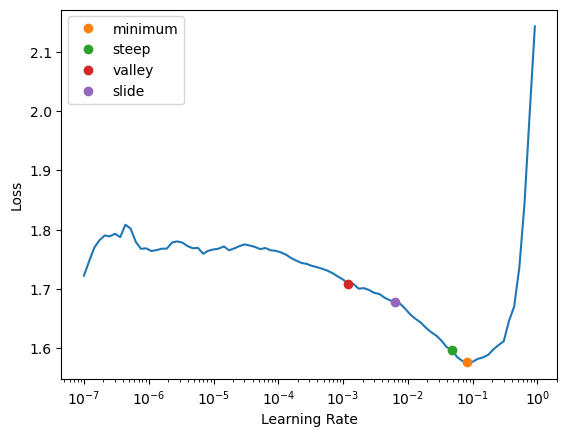

In [12]:
## If training, set learning rate. When training, lr_find can be useful for picking a more optimal learning rate.
if is_training and lr <= 0:
    lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
    lr = lrs.valley

In [13]:
if is_training:
    ## Train the model and export to file.
    learn.fine_tune(epochs=n_epochs, base_lr=lr, freeze_epochs=n_freeze_epochs)
    learn.export(file_name)
else:
    ## Load model for testing
    learn = load_learner(file_name)

epoch,train_loss,valid_loss,mae,mse,_rmse,r2_score,time
0,1.708483,1.344320,1.344320,2.771279,1.664716,-1.945998,00:49
1,1.688601,1.052630,1.052630,1.611915,1.269612,-0.713540,00:49
2,1.629144,0.885184,0.885184,1.237214,1.112301,-0.315216,00:49
3,1.610128,0.840860,0.840860,1.130207,1.063112,-0.201462,00:49


epoch,train_loss,valid_loss,mae,mse,_rmse,r2_score,time
0,1.479968,0.766703,0.766703,0.929056,0.963875,0.012371,00:52
1,1.442513,0.795561,0.795561,0.957578,0.978559,-0.017949,00:51
2,1.419335,0.802008,0.802008,0.988608,0.994288,-0.050936,00:51
3,1.421389,0.803210,0.803210,0.985217,0.992581,-0.047331,00:51
4,1.409087,0.783453,0.783453,0.931708,0.965250,0.009551,00:52
5,1.393383,0.766234,0.766234,0.894045,0.945540,0.049588,00:52
6,1.382694,0.762678,0.762678,0.875896,0.935893,0.068882,00:50
7,1.369995,0.761361,0.761361,0.859635,0.927165,0.086168,00:51
8,1.356647,0.754227,0.754227,0.840661,0.916876,0.106338,00:51
9,1.344875,0.749774,0.749774,0.836075,0.914371,0.111214,00:51


In [14]:
## Predict on the test dataset.
dl = learn.dls.test_dl(test)
preds, _ = learn.get_preds(dl=dl)

In [15]:
## Extract list of photo IDs.
photo_id_col = test["photo_id"].tolist()

## Undo feature scaling.
preds = pd.DataFrame(scaler.inverse_transform(preds), columns=traits)

## Append the photo_id column
preds['photo_id'] = photo_id_col
preds.head(10)

,perimeter1_cm,width1_cm,heigth1_cm,perimeter2_cm,width2_cm,heigth2_cm,prox_angl_macr,distal_angl_macr,tomat_pericap_area,tomat_pericap_area_ratio,tomat_pericap_thick,tomat_pericap_thick_ratio,photo_id
0,80.328865,21.808226,25.346503,83.937651,22.887702,26.486447,131.660007,143.506403,92.368551,0.187543,1.149676,0.200009,7373
1,64.216385,16.786971,20.333378,68.070170,17.738909,21.841086,136.932873,133.267945,53.147575,0.172811,0.804766,0.200013,7205
2,65.975327,17.333543,21.495711,69.955437,18.311915,22.340634,127.018117,138.096012,58.828206,0.180451,0.869541,0.199999,6894
3,77.521977,15.909826,28.946796,81.304841,16.758668,29.818601,108.887556,91.427212,73.885786,0.184707,0.953039,0.200004,6974
4,78.806441,16.130055,29.220588,83.422125,17.054538,30.644143,106.879472,97.212567,75.673741,0.179938,0.949213,0.200004,7327
5,68.077748,18.306641,20.853364,73.769014,18.898820,23.506935,131.508955,132.069480,67.140915,0.189591,0.947428,0.200022,7727
6,81.412958,17.197201,29.900981,85.449272,17.868719,31.405705,101.873312,99.404264,82.470556,0.180864,1.001479,0.199998,6981
7,66.350333,17.408896,21.244656,69.592791,18.400611,22.074862,132.782690,129.330482,55.425538,0.175273,0.824046,0.200014,7387
8,65.199701,14.379791,23.357562,70.289095,15.212005,24.691560,110.890411,112.275818,55.706027,0.181678,0.816213,0.200008,7294
9,73.419410,16.799960,25.976339,76.749770,17.658348,27.073203,117.963617,102.780043,69.599227,0.182864,0.947599,0.200000,7005


In [16]:
## Drop photo_id and combined as undoing feature scaling using sklearn returns a numpy array, losing the dataframe's column names.
test = test.drop(['photo_id', 'combined'], axis=1, errors='ignore')
test.index = range(len(test.index))

## Undo feature scaling.
test = pd.DataFrame(scaler.inverse_transform(test), columns=traits)

## Append the photo_id column
test['photo_id'] = photo_id_col
test.head(10)

,perimeter1_cm,width1_cm,heigth1_cm,perimeter2_cm,width2_cm,heigth2_cm,prox_angl_macr,distal_angl_macr,tomat_pericap_area,tomat_pericap_area_ratio,tomat_pericap_thick,tomat_pericap_thick_ratio,photo_id
0,78.31,21.43,25.21,83.16,22.55,26.60,120.3,140.8,92.13,0.19,1.16,0.2,7373
1,64.07,16.83,19.79,65.93,17.61,20.71,133.6,133.7,35.80,0.12,0.56,0.2,7205
2,64.22,17.38,20.79,69.87,18.34,21.97,130.3,139.8,62.73,0.20,0.94,0.2,6894
3,91.12,14.79,26.33,81.49,16.83,29.87,111.0,76.3,76.62,0.19,0.98,0.2,6974
4,61.69,13.59,22.41,81.97,16.58,30.70,99.1,92.1,72.36,0.18,0.92,0.2,7327
5,67.71,18.25,22.06,73.26,19.23,23.25,145.2,126.5,69.12,0.20,0.98,0.2,7727
6,80.15,16.61,29.63,84.77,17.47,31.40,90.6,99.4,84.74,0.19,1.04,0.2,6981
7,62.30,17.14,19.71,68.79,17.92,20.77,143.1,128.2,36.19,0.12,0.54,0.2,7387
8,60.84,12.64,22.09,64.43,13.65,23.33,105.8,100.9,45.60,0.18,0.74,0.2,7294
9,70.99,16.88,25.27,74.37,17.58,26.60,122.5,88.0,63.03,0.18,0.88,0.2,7005


In [17]:
## Create empty dataframe to combine test and preds into.
test_preds_combined = pd.DataFrame()

## Iterate through test and preds and append each row. Even rows are test data, the next index is the predicted value.
for i in range(len(preds)):
    test_preds_combined = pd.concat([test_preds_combined, test.iloc[i]], axis=1)
    test_preds_combined = pd.concat([test_preds_combined, preds.iloc[i]], axis=1)

## Transform dataframe to have the same structure as the originals.
test_preds_combined = test_preds_combined.T.reset_index(drop=True)

## Export dataframe to a csv file.
test_preds_combined.to_csv(file_name + '_combined.csv')
test_preds_combined

,perimeter1_cm,width1_cm,heigth1_cm,perimeter2_cm,width2_cm,heigth2_cm,prox_angl_macr,distal_angl_macr,tomat_pericap_area,tomat_pericap_area_ratio,tomat_pericap_thick,tomat_pericap_thick_ratio,photo_id
0,78.310000,21.430000,25.210000,83.160000,22.550000,26.600000,120.300000,140.800000,92.130000,0.190000,1.160000,0.200000,7373.0
1,80.328865,21.808226,25.346503,83.937651,22.887702,26.486447,131.660007,143.506403,92.368551,0.187543,1.149676,0.200009,7373.0
2,64.070000,16.830000,19.790000,65.930000,17.610000,20.710000,133.600000,133.700000,35.800000,0.120000,0.560000,0.200000,7205.0
3,64.216385,16.786971,20.333378,68.070170,17.738909,21.841086,136.932873,133.267945,53.147575,0.172811,0.804766,0.200013,7205.0
4,64.220000,17.380000,20.790000,69.870000,18.340000,21.970000,130.300000,139.800000,62.730000,0.200000,0.940000,0.200000,6894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,78.624786,16.132545,28.394914,83.949824,16.996639,30.667248,106.502300,100.591087,70.924584,0.169859,0.881012,0.200005,6797.0
114,66.640000,17.890000,21.430000,70.120000,18.840000,22.550000,128.300000,122.900000,58.390000,0.180000,0.870000,0.200000,6933.0
115,67.896598,17.901210,21.912660,71.222280,18.998285,22.826282,133.308418,135.472691,68.922567,0.195790,1.002653,0.200008,6933.0
116,87.240000,20.900000,28.410000,89.650000,22.020000,29.670000,127.100000,134.100000,103.880000,0.190000,1.210000,0.200000,7189.0


In [18]:
## Calculate regression metrics for all columns combined except photo_id.
print('Mean squared error: ' + str(mean_squared_error(test.iloc[:, :-1], preds.iloc[:, :-1])))
print('Mean absolute error: ' + str(mean_absolute_error(test.iloc[:, :-1], preds.iloc[:, :-1])))
print('R2 score: ' + str(r2_score(test.iloc[:, :-1], preds.iloc[:, :-1])))

Mean squared error: 14.934733515665625
Mean absolute error: 1.942797531846996
R2 score: 0.7691741779381548


In [19]:
## Calculate regression metrics for each column individually.
for i, name in enumerate(traits):
    print('Mean squared error for column ' + name + ': ' + str(mean_squared_error(test.iloc[:, i], preds.iloc[:, i])))
    print('Mean absolute error for column ' + name + ': ' + str(mean_absolute_error(test.iloc[:, i], preds.iloc[:, i])))
    print('R2 score for column ' + name + ': ' + str(r2_score(test.iloc[:, i], preds.iloc[:, i])) + '\n')

Mean squared error for column perimeter1_cm: 14.370946933738686
Mean absolute error for column perimeter1_cm: 2.571783357575298
R2 score for column perimeter1_cm: 0.8718720065558104

Mean squared error for column width1_cm: 0.5533693540963884
Mean absolute error for column width1_cm: 0.547282417571838
R2 score for column width1_cm: 0.9207497361994187

Mean squared error for column heigth1_cm: 1.9196067251847733
Mean absolute error for column heigth1_cm: 0.9418789598269411
R2 score for column heigth1_cm: 0.897612150339939

Mean squared error for column perimeter2_cm: 5.744541605547775
Mean absolute error for column perimeter2_cm: 1.7985013904843576
R2 score for column perimeter2_cm: 0.9447414942505751

Mean squared error for column width2_cm: 0.45385326271456483
Mean absolute error for column width2_cm: 0.5253193103408486
R2 score for column width2_cm: 0.9383547105383115

Mean squared error for column heigth2_cm: 0.9294345731339143
Mean absolute error for column heigth2_cm: 0.7238260494

In [20]:
## valid_ranges stores margins of error to be checked.
valid_ranges = dict.fromkeys([0.1, 0.05, 0.025, 0.01])
## Iterate through each margin of error and save each row where every column is within that percent of the test values. 
for percent in valid_ranges:
    accurate_preds = preds.copy()
    size_matched_test = test.copy()
    for col in traits:
        accurate_preds = accurate_preds.loc[(accurate_preds[col] >= (size_matched_test[col]*(1-percent))) & (accurate_preds[col] <= (size_matched_test[col]*(1+percent)))]
        size_matched_test = size_matched_test[size_matched_test['photo_id'].isin(accurate_preds['photo_id'])]
    valid_ranges[percent] = accurate_preds

In [21]:
## Print proportion of the predicted values that are within each margin of error of the test set.
for percent in valid_ranges:
    print(f'Accurate within ' + str(percent * 100) + "% of test: " + str(len(valid_ranges[percent]) / len(test)))

Accurate within 10.0% of test: 0.5254237288135594
Accurate within 5.0% of test: 0.11864406779661017
Accurate within 2.5% of test: 0.0
Accurate within 1.0% of test: 0.0
